We will be using **Pandas** as data analysis tool and **Scikit-Learn** for machine learning. As this is very small but proof of concept work/implementation, we will only be looking at how we can use built-in/provide methods and do some *AI stuffs*
Explaining imports :
 - To easily use pandas, we are importing and giving it alias pd, so we can call it with ease.
 - Importing a decision tree classifier, which will do our work. Our main job is to feed data to that.
 - As we are trying to keep our project as much clean as possible, we are importing function to split dataset. More data input/csv files may mean less cleaner project, for most of the time.
 - Accuracy score is just to calculate accuracy, we can say that by it's name
 - Plot confusion matrix will plot the confusion matrix. And it will be using matplotlib to plot the result. But we don't need to import it seperatly, cause scikit will do that as it is scikit's dependency too. But we can still import and do some fun stuff with matplotlib.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

We will be importing data with **Pandas** method. Then check it's structure. By calling **Pandas** another method `head` we can do so. It just shows us first rows we asked for, by default 5. *So we can take a glipse of the dataset.* Really helpful, as based on this data we will be doing our *AI stuffs*, so first we need to know how they are. And then we can apply proper encoding on them. Most of the time, they need one, as real world data aren't just something that computer can read and understand. We are trying to do so.

In [59]:
data_raw = pd.read_csv('./data.csv')
data_raw.head()

,outlook,Temperature,Humidity,wind,played football(yes/no)
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes


Why are we coping we will discuss that in the last cell. This may missguide us. Or interrupt us.

In [60]:
data = data_raw.copy()

As we told before computer can't read real world data, like *hot, mild or cold*, we have to encode them onto something. As computers are good with numbers, we are encoding them with *1,0,-1* respectively. We did this thing for all row, as they are something we call string, and that string contains something actually meaningful, which is completly *understandable* to computer. So we encoded each are every of them to some number.

In [61]:
data['Temperature']=data['Temperature'].replace(['hot','mild','cool'],[1,0,-1])
data['outlook']=data['outlook'].replace(['sunny','overcast','rain'],[1,0,-1])
data['Humidity']=data['Humidity'].replace(['high','normal'],[1,0])
data['wind']=data['wind'].replace(['strong','weak'],[1,0])
data['played football(yes/no)']=data['played football(yes/no)'].replace(['yes','no'],[1,0])

Then we simply saw those data once again, and we are good to to go.

In [62]:
data.head()

,outlook,Temperature,Humidity,wind,played football(yes/no)
0,1,1,1,0,0
1,1,1,1,1,0
2,0,1,1,0,1
3,-1,0,1,0,1
4,-1,-1,0,0,1


In [63]:
X = data[['outlook','Temperature','Humidity','wind']].copy()
Y = data[['played football(yes/no)']].copy()

In [64]:
X.head()

,outlook,Temperature,Humidity,wind
0,1,1,1,0
1,1,1,1,1
2,0,1,1,0
3,-1,0,1,0
4,-1,-1,0,0


In [65]:
Y.head()

,played football(yes/no)
0,0
1,0
2,1
3,1
4,1


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
model = DecisionTreeClassifier(max_leaf_nodes=42, random_state=0)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=42, random_state=0)

In [68]:
#outlook, temperature, humadity, wind 
#model.predict([[1,1,1,0]])

In [69]:
pred = model.predict(X_test)

In [70]:
accuracy_score(y_true = Y_test, y_pred = pred)

0.6666666666666666

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'show'

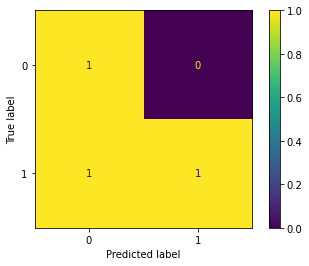

In [72]:
plt = plot_confusion_matrix(model, X_test, Y_test)  
plt.show() 